In [1]:
import seaborn as sns
from foof.util import create_psd
%matplotlib inline

%run ../thal.py

Starting simulation for duration 1. s
0.8485 s (84%) simulated in 10s, estimated 2s remaining.
1. s (100%) simulated in 11s


WARNING  py.warnings: /home/ejp/anaconda/lib/python2.7/site-packages/scipy/signal/spectral.py:281: UserWarning: nperseg = 1024, is greater than x.shape[-1] = 921, using nperseg = x.shape[-1]
  % (nperseg, axis, x.shape[axis], axis))

  % (nperseg, axis, x.shape[axis], axis))



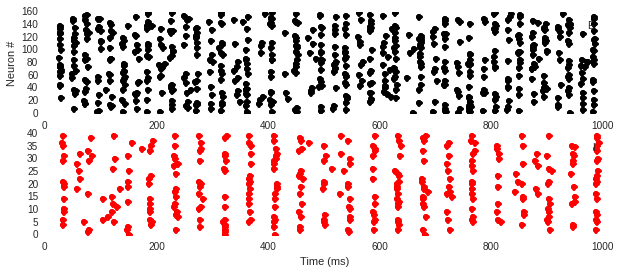

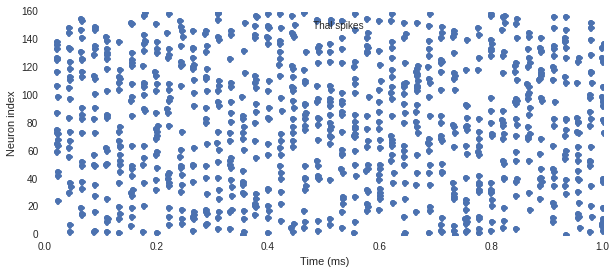

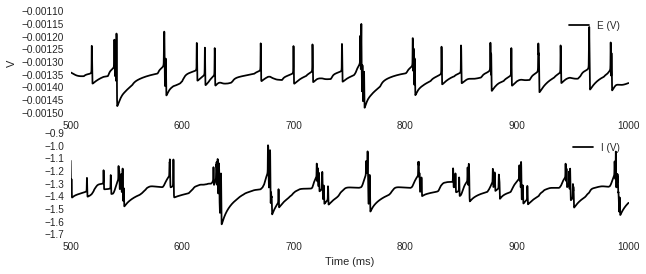

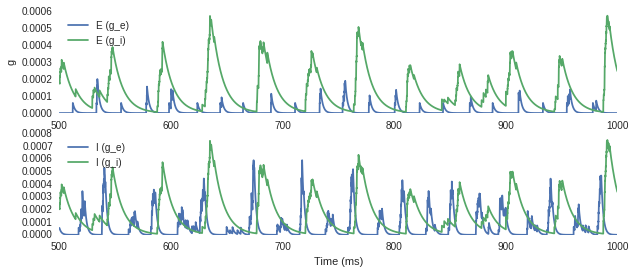

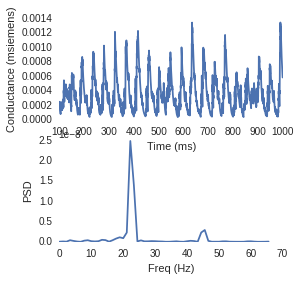

In [2]:
# Raster
figure(figsize=(10, 4))
subplot(211)
plot(spikes_e.t/ms, spikes_e.i, 'o', label='E', color='k')
ylabel("Neuron #")
legend()

subplot(212)
plot(spikes_i.t/ms, spikes_i.i, 'o', label='I', color='r')
xlabel("Time (ms)")
legend()

figure(figsize=(10,4))
plot(times, indices, 'o', label='Thal spikes')
xlim(0,1)
xlabel("Time (ms)")
ylabel("Neuron index")
legend(loc='best')

# V
tn = 5000
figure(figsize=(10,4))
subplot(211)
plot(voltages_e.t[tn:]/ms, voltages_e.V.sum(0)[tn:]*mV, label='E (V)', color='k')
ylabel("V")
legend()

subplot(212)
plot(voltages_i.t[tn:]/ms, voltages_i.V.sum(0)[tn:]*volt, label='I (V)', color='k')
xlabel("Time (ms)")
legend()

# gs
figure(figsize=(10,4))
subplot(211)
plot(voltages_e.t[tn:]/ms, voltages_e.g_e.sum(0)[tn:], label='E (g_e)')
plot(voltages_e.t[tn:]/ms, voltages_e.g_i.sum(0)[tn:], label='E (g_i)')
ylabel("g")
legend(loc='best')

subplot(212)
plot(voltages_i.t[tn:]/ms, voltages_i.g_e.sum(0)[tn:], label='I (g_e)')
plot(voltages_i.t[tn:]/ms, voltages_i.g_i.sum(0)[tn:], label='I (g_i)')
xlabel("Time (ms)")
legend(loc='best')

# Spectra
lfp = (np.abs(voltages_e.g_e.sum(0)) + 
    np.abs(voltages_e.g_i.sum(0)) + 
    np.abs(voltages_i.g_e.sum(0)) + 
    np.abs(voltages_i.g_i.sum(0)))
lfp = lfp[1000:]  # Drop initial spike

figure(figsize=(4,4))
subplot(211)
plot(voltages_i.t[1000:]/ms, lfp, label='LFP')
xlabel("Time (ms)")
ylabel("Conductance (msiemens)")

subplot(212)
fs, spec = create_psd(lfp, 10000)
plot(fs[:60], spec[:60])
xlabel("Freq (Hz)")
ylabel("PSD")

In [3]:
%%javascript
if($(IPython.toolbar.selector.concat(' > #kill-run-all')).length == 0){
  IPython.toolbar.add_buttons_group([
        {
             'label'   : 'kill and run-all',
             'icon'    : 'fa fa-angle-double-down',
             'callback': function(){
                 IPython.notebook.kernel.restart();
                 $(IPython.events).one('kernel_ready.Kernel',
                                       function(){IPython.notebook.execute_all_cells();});
             }
        }
    ], 'kill-run-all');
}

<IPython.core.display.Javascript object>